# KNN Modelling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
%matplotlib inline

In [2]:
# import library to display multiple outputs
from IPython.display import display

# Importing dataset
data = pd.read_csv('D:/Master/CDS503 Machine Learning/Project/Dataset/StudentsPerformance.csv')

# see some of it, their overall statistics and dimensions
display(data.head(5))
display(data.describe())
display(data.shape)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


(1000, 8)

1. Transforming all categorical data into numerical data

In [3]:
# convert categorical variable to numeric
data["gender_cleaned"] = np.where(data["gender"]=="male", 0, 1)
data["race/ethnicity_cleaned"] = np.where(data["race/ethnicity"]=="group A", 0,
                                         np.where(data["race/ethnicity"]=="group B", 1,
                                                np.where(data["race/ethnicity"]=="group C", 2,
                                                        np.where(data["race/ethnicity"]=="group D", 3, 4))))
data["parental_education_cleaned"] = np.where(data["parental level of education"]=="high school", 0,
                                         np.where(data["parental level of education"]=="some high school", 1,
                                                np.where(data["parental level of education"]=="some college", 2,
                                                         np.where(data["parental level of education"]=="bachelor's degree", 3,
                                                                  np.where(data["parental level of education"]=="associate's degree", 4, 5)))))
data["lunch_cleaned"] = np.where(data["lunch"]=="standard", 0, 1)
data["test_preparation_cleaned"] = np.where(data["test preparation course"]=="none", 0, 1)

In [4]:
print(data["gender_cleaned"].value_counts())
print(data["race/ethnicity_cleaned"].value_counts())
print(data["parental_education_cleaned"].value_counts())
print(data["lunch_cleaned"].value_counts())
print(data["test_preparation_cleaned"].value_counts())

1    518
0    482
Name: gender_cleaned, dtype: int64
2    319
3    262
1    190
4    140
0     89
Name: race/ethnicity_cleaned, dtype: int64
2    226
4    222
0    196
1    179
3    118
5     59
Name: parental_education_cleaned, dtype: int64
0    645
1    355
Name: lunch_cleaned, dtype: int64
0    642
1    358
Name: test_preparation_cleaned, dtype: int64


In [5]:
#combine all 3 score into 1 single score
total_score = data['writing score'] + data['reading score'] + data['math score']
data['total_score'] = total_score
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_cleaned,race/ethnicity_cleaned,parental_education_cleaned,lunch_cleaned,test_preparation_cleaned,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,1,1,3,0,0,218
1,female,group C,some college,standard,completed,69,90,88,1,2,2,0,1,247
2,female,group B,master's degree,standard,none,90,95,93,1,1,5,0,0,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,0,0,4,1,0,148
4,male,group C,some college,standard,none,76,78,75,0,2,2,0,0,229


In [6]:
#remove the old attributes after cleaned
data = data.drop(columns=['lunch','gender','race/ethnicity','parental level of education','test preparation course'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   math score                  1000 non-null   int64
 1   reading score               1000 non-null   int64
 2   writing score               1000 non-null   int64
 3   gender_cleaned              1000 non-null   int32
 4   race/ethnicity_cleaned      1000 non-null   int32
 5   parental_education_cleaned  1000 non-null   int32
 6   lunch_cleaned               1000 non-null   int32
 7   test_preparation_cleaned    1000 non-null   int32
 8   total_score                 1000 non-null   int64
dtypes: int32(5), int64(4)
memory usage: 50.9 KB


In [7]:
#get the average of total score
avg_total_score = data['total_score'] / 3
data['avg_total_score'] = avg_total_score

#drop column total score
data = data.drop(columns=['total_score'])
data.head()

,math score,reading score,writing score,gender_cleaned,race/ethnicity_cleaned,parental_education_cleaned,lunch_cleaned,test_preparation_cleaned,avg_total_score
0,72,72,74,1,1,3,0,0,72.666667
1,69,90,88,1,2,2,0,1,82.333333
2,90,95,93,1,1,5,0,0,92.666667
3,47,57,44,0,0,4,1,0,49.333333
4,76,78,75,0,2,2,0,0,76.333333


In [8]:
#change average score to classification 0 - fail, 1 - pass
passing_marks = 40
data['avg_total_score'] = np.where(data['avg_total_score'] < passing_marks ,'0','1')
data.head()

,math score,reading score,writing score,gender_cleaned,race/ethnicity_cleaned,parental_education_cleaned,lunch_cleaned,test_preparation_cleaned,avg_total_score
0,72,72,74,1,1,3,0,0,1
1,69,90,88,1,2,2,0,1,1
2,90,95,93,1,1,5,0,0,1
3,47,57,44,0,0,4,1,0,1
4,76,78,75,0,2,2,0,0,1


In [9]:
# import label encoder library to deal with categorical data
from sklearn.preprocessing import LabelEncoder

# select all columns except the last one (the target label)
x=data.iloc[:,:-1]

# set target categorical data label (the last attribute)
y=data.iloc[:,-1]

labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
print (x)
print (y)

     math score  reading score  writing score  gender_cleaned  \
0            72             72             74               1   
1            69             90             88               1   
2            90             95             93               1   
3            47             57             44               0   
4            76             78             75               0   
..          ...            ...            ...             ...   
995          88             99             95               1   
996          62             55             55               0   
997          59             71             65               1   
998          68             78             77               1   
999          77             86             86               1   

     race/ethnicity_cleaned  parental_education_cleaned  lunch_cleaned  \
0                         1                           3              0   
1                         2                           2              0 

In [10]:
#select specific/related features
used_features=[ 
    "math score",
    "reading score",
    "writing score",
    "gender_cleaned",
    "race/ethnicity_cleaned",
    "parental_education_cleaned",
    "lunch_cleaned",
    "test_preparation_cleaned"
]

x = data[used_features] # select all attributes
y = data["avg_total_score"] #class target

display(x.shape)

(1000, 8)

Splitting the data into 70% training data and 30% test data

In [11]:
x = data [used_features]
y = data["avg_total_score"]

#import machine learning library to sample the data
from sklearn.model_selection import train_test_split

# split the data into training data and test data
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=0)

Sampling the data because the data not balance

In [12]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import make_classification
from collections import Counter
#instantiating the random oversampler 
ros = RandomOverSampler()
# resampling X, y
x_train1, y_train1 = ros.fit_resample(x_train, y_train)

# new class distribution 
print(Counter(y_train1))

Counter({'1': 680, '0': 680})


In [13]:
print('x axis test')
print(x_test)
print('x axis train')
print(x_train1)
print('y axis test')
print(y_test)
print('y axis train')
print(y_train1)

x axis test
     math score  reading score  writing score  gender_cleaned  \
993          62             72             74               1   
859          87             73             72               0   
298          40             46             50               0   
553          77             62             64               0   
672          69             78             76               1   
..          ...            ...            ...             ...   
167          58             76             78               1   
998          68             78             77               1   
984          74             75             82               1   
491          64             64             70               1   
10           58             54             52               0   

     race/ethnicity_cleaned  parental_education_cleaned  lunch_cleaned  \
993                       3                           3              1   
859                       2                           4    

KNN with k=5

In [14]:
# import machine learning library to standardize the data
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
sc.fit_transform(x_train1,y_train1)
sc.fit(x_test,y_test)

StandardScaler()

In [15]:
# K = 5 (Default value of the algorithm)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
knn.fit(x_train1, y_train1)

KNeighborsClassifier()

The prediction accuracy is: 
[[  9   1]
 [  1 289]]


Text(0.5, 51.0, 'Predicted label')

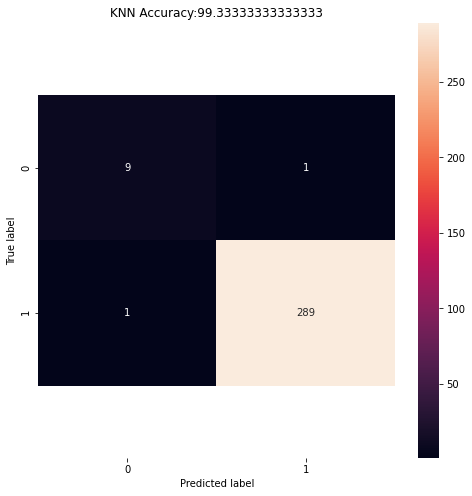

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

# Prediction 
y_pred = knn.predict(x_test)

print("The prediction accuracy is: ".format(knn.score(x_test, y_test)))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm, index = ['0','1'], columns = ['0','1'])
                                                         
# plot the confusion matrix
plt.figure(figsize=(8,8))
ax= sns.heatmap(cm_df, annot=True, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("KNN Accuracy:" + str(knn.score(x_test,y_test)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')

KNN using loop

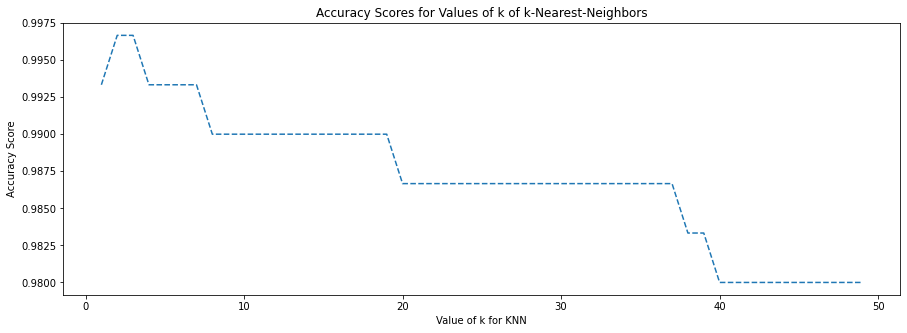

In [17]:
# import KNN model as 'KNeighborsClassifier'
from sklearn.neighbors import KNeighborsClassifier

# empty variable for storing the KNN metrics
scores=[]

# We try different values of k for the KNN (from k=1 up to k=20)
lrange=list(range(1,50))

# loop the KNN process
for k in lrange:
 # input the k value and 'distance' measure
 knn=KNeighborsClassifier(n_neighbors=k)
 # input the train data to train KNN
 knn.fit(x_train1,y_train1)
 # see KNN prediction by inputting the test data
 y_pred=knn.predict(x_test)
 # append the performance metric (accuracy)
 scores.append(accuracy_score(y_test,y_pred))
plt.figure(2,figsize=(15,5))

# plot the results
plt.plot(lrange, scores,ls='dashed')
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

KNN with parameter tuning

The prediction accuracy is: 
[[ 10   0]
 [  4 286]]


Text(0.5, 51.0, 'Predicted label')

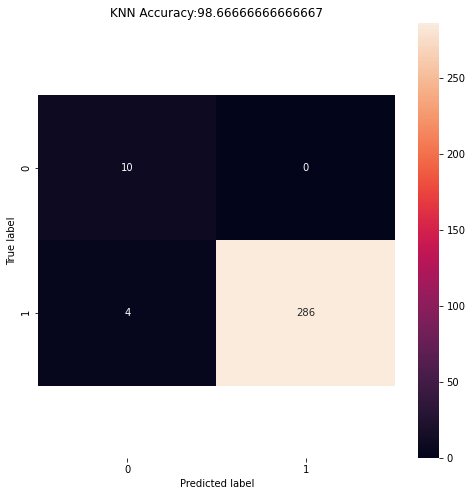

In [18]:
# input the k value and 'distance' measure
knn=KNeighborsClassifier(n_neighbors=k, weights='distance', algorithm='auto')
# input the train data to train KNN
knn.fit(x_train1,y_train1)

# Prediction 
y_pred = knn.predict(x_test)

print("The prediction accuracy is: ".format(knn.score(x_test, y_test)))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm, index = ['0','1'], columns = ['0','1'])
                                                         
# plot the confusion matrix
plt.figure(figsize=(8,8))
ax= sns.heatmap(cm_df, annot=True, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("KNN Accuracy:" + str(knn.score(x_test,y_test)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        10
           1       1.00      0.99      0.99       290

    accuracy                           0.99       300
   macro avg       0.86      0.99      0.91       300
weighted avg       0.99      0.99      0.99       300



In [24]:
# Applying 5-Fold Cross Validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, x_train1, y_train1, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

# compute Average cross-validation score
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.99632353 0.99264706 0.98897059 0.99264706 0.99264706]
Average cross-validation score: 0.9926
